# Corrélation entre retards et fréquentation d'une ligne :

L'objectif de cette section est d'essayer d'établir si il existe un lien de corrélation entre le taux de ponctualité sur une ligne de transiliens sur une année et la fréquentation de cette même ligne l'année suivante.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

On importe dans un premier temps les bases de données utiles pour notre étude : la base compatge_oyageurs qui réunit sur différentes années les comptages journaliers dans différentes gares d'une même ligne ; et la base ponctualité mensuelle qui réunit sur différentes années le taux de ponctualité journalier sur les lignes de transiliens.
En les important, on nettoie les bases de données en enlevant les valeurs manquantes.

In [5]:
comptage_voyageurs = pd.read_csv('comptage-voyageurs-trains-transilien.csv', sep = ';' , na_values= ['--' , 'ie'])

In [6]:
ponctualite_mensuelle = pd.read_csv('ponctualite-mensuelle-transilien.csv', sep = ';' , na_values= ['--' , 'ie'])

# Etude de la base comptage_voyageurs :

On commence d'abord par sélectionner la tranche d'année pour laquelle on va étudier les retards : on la garde en mémoire dans la liste annee_retards.

In [7]:
annee_d_etudes = comptage_voyageurs['Annee'].unique()
annee_d_etudes.sort()
annee_retards = annee_d_etudes -1

Pour mieux manier la base de données ponctualite_mensuelle, on épure les données temporelles en ne gardant que l'année.

In [8]:
ponctualite_mensuelle['Date'] = pd.to_datetime(ponctualite_mensuelle['Date'])
ponctualite_mensuelle['Année'] = ponctualite_mensuelle['Date'].dt.year

On garde uniquement les collonnes qui nous intéressent pour notre étude puis on réunit les différentes lignes de notre base selon l'année et la ligne à laquelle elle est associée.

In [9]:
ponctualite_mensuelle_groupee = ponctualite_mensuelle.groupby(['Année', 'Ligne'])['Taux de ponctualité'].mean().reset_index()

On nettoie encore une fois la base de données en enlevant les valeurs manquantes. 
Ensuite, on réindexe la base de données à l'aide du multi-index (Année, Ligne) et garde en mémoire cette base avec la variable p_etude.

In [11]:
ponctualite_mensuelle_groupee_etude = ponctualite_mensuelle_groupee[ponctualite_mensuelle_groupee['Année'].isin(annee_retards)]
p_etude = ponctualite_mensuelle_groupee_etude.set_index(['Année', 'Ligne'])

On affiche l'évolution du taux de ponctualité pour les différentes lignes sur la tranche d'année 2013-2020 à l'aide de la bibliothèque seaborn.

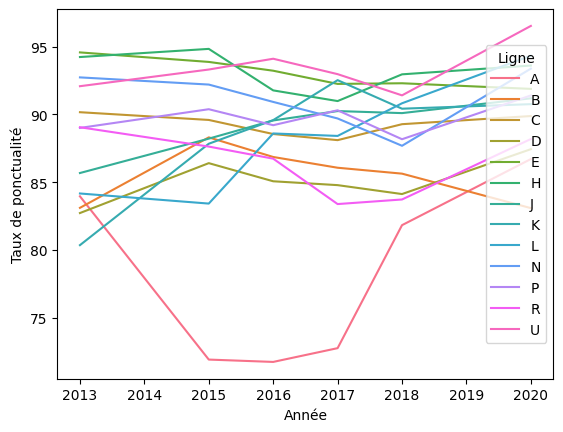

In [13]:
gr = sns.lineplot(x='Année', y='Taux de ponctualité', hue='Ligne', data=p_etude)
sns.move_legend(gr, "right")

## Etude de la base comptage_voyageurs :

On commence d'abord par nettoyer notre base et par conbserver uniquement les données qui nous intéressent.

In [16]:
c_nettoye = comptage_voyageurs.drop(['Nom gare', 'Code Gare', 'Type jour', 'Date', 'Axe', 'Tranche horaire', 'COVID'], axis=1)

On regroupe les lignes par année et par ligne de transiliens en les additionnant pour obtenir le nombre total de voyageurs sur chaque ligne pendant l'année considérée.

In [18]:
comptage = c_nettoye.groupby(['Annee', 'Ligne'])['Montants'].sum().reset_index()

On réindexe la base de données à l'aide du multi-index (Année, Ligne) et garde en mémoire cette base avec la variable c_etude.

In [ ]:
c_etude = comptage.set_index(['Annee', 'Ligne'])